# Load data and librares

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from jupyter_dash import JupyterDash
import dash_html_components as html 
import dash_bootstrap_components as dbc
import dash_core_components as dcc
from dash.dependencies import Input, Output
warnings.filterwarnings("ignore")

/var/folders/x5/v3tlskg15f9f7p67b1f0xrmc0000gn/T/ipykernel_7028/1438247649.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/x5/v3tlskg15f9f7p67b1f0xrmc0000gn/T/ipykernel_7028/1438247649.py:11: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [2]:
RiyadhVillas=pd.read_csv('RiyadhVillasAqar.csv')

In [3]:
RiyadhVillas.head()

Unnamed: 0         front  rooms lounges bathrooms  streetWidth  stairs  \
0           0         شرقية      5     4.0        5+         20.0     1.0   
1           1         غربية      4     3.0        5+         20.0     1.0   
2           2  جنوبية شرقية      7     2.0        5+         15.0     1.0   
3           3         غربية      7     3.0        5+         15.0     1.0   
4           4        شمالية      4     2.0         4         25.0     1.0   

   propertyAge  driverRoom  tent  ...  apartments  maidRoom  elevator  \
0          0.0         1.0   1.0  ...           0       0.0       0.0   
1          0.0         1.0   1.0  ...         2.0       1.0       1.0   
2         31.0         1.0   0.0  ...           0       1.0       0.0   
3          3.0         0.0   1.0  ...           0       1.0       0.0   
4          0.0         1.0   1.0  ...         3.0       1.0       1.0   

   furnihsed  pool  basement neighbourhood     location      price  \
0        0.0   0.0       0.0         عكاظ   جنوب الرياض  1050000.0   
1        0.0   0.0       0.0      المهدية    غرب الرياض  3000000.0   
2        0.0   0.0       0.0        الشفا   جنوب الرياض  2000000.0   
3        1.0   0.0       0.0     ظهرة لبن    غرب الرياض   894000.0   
4        1.0   0.0       0.0        قرطبة    شرق الرياض  3500000.0   

   square price  
0   3500.000000  
1   5555.555556  
2   2285.714286  
3   4470.000000  
4   8750.000000  

[5 rows x 26 columns]

# Data Cleaning and Preprocessing


### describe data

In [4]:
RiyadhVillas.shape

(46826, 26)

In [5]:
RiyadhVillas.describe()

Unnamed: 0         rooms   streetWidth        stairs   propertyAge  \
count  46826.000000  46826.000000  46636.000000  46826.000000  46826.000000   
mean   25915.132384      4.687439     18.158418      0.683979      2.454790   
std    14993.821359      1.104970      4.167866      0.464926      6.496833   
min        0.000000      1.000000      1.000000      0.000000      0.000000   
25%    12925.250000      4.000000     15.000000      0.000000      0.000000   
50%    25836.500000      5.000000     20.000000      1.000000      0.000000   
75%    38917.750000      5.000000     20.000000      1.000000      0.000000   
max    51844.000000      7.000000    100.000000      1.000000     35.000000   

         driverRoom          tent         patio       kitchen   outdoorRoom  \
count  46826.000000  46826.000000  46826.000000  46826.000000  46826.000000   
mean       0.355871      0.466258      0.769380      0.979114      0.645112   
std        0.478781      0.498866      0.421234      0.143004      0.478485   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      1.000000      0.000000   
50%        0.000000      0.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             garage        duplex         space      maidRoom      elevator  \
count  46826.000000  46826.000000  46826.000000  46826.000000  46826.000000   
mean       0.907872      0.297698    380.021740      0.767821      0.235745   
std        0.289210      0.457251    281.431272      0.422227      0.424468   
min        0.000000      0.000000     50.000000      0.000000      0.000000   
25%        1.000000      0.000000    270.000000      1.000000      0.000000   
50%        1.000000      0.000000    312.000000      1.000000      0.000000   
75%        1.000000      1.000000    400.000000      1.000000      0.000000   
max        1.000000      1.000000  10000.000000      1.000000      1.000000   

          furnihsed          pool      basement         price   square price  
count  46826.000000  46826.000000  46826.000000  4.682400e+04   46824.000000  
mean       0.078738      0.116410      0.037671  2.347636e+06    6088.058800  
std        0.269333      0.320719      0.190402  2.782053e+06    4515.845244  
min        0.000000      0.000000      0.000000  1.080000e+03       3.428571  
25%        0.000000      0.000000      0.000000  1.180000e+06    3866.666667  
50%        0.000000      0.000000      0.000000  1.600000e+06    5000.000000  
75%        0.000000      0.000000      0.000000  2.600000e+06    7600.000000  
max        1.000000      1.000000      1.000000  1.000000e+08  136144.578313

In [6]:
RiyadhVillas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

### Handle missing values

In [7]:
# here we find that null lounges meant there is no lounge
print('null values in lounges:',RiyadhVillas['lounges'].isnull().sum())
print('Zero values in lounges:',RiyadhVillas[RiyadhVillas['lounges']==0].shape)

null values in lounges: 1118
Zero values in lounges: (0, 26)


In [8]:
RiyadhVillas['lounges']=RiyadhVillas['lounges'].fillna(0)
print('null values in lounges:',RiyadhVillas['lounges'].isnull().sum())
print('Zero value in lounges :',RiyadhVillas[RiyadhVillas['lounges']==0].count())

null values in lounges: 0
Zero value in lounges : Unnamed: 0       1118
front            1118
rooms            1118
lounges          1118
bathrooms        1118
streetWidth      1100
stairs           1118
propertyAge      1118
driverRoom       1118
tent             1118
patio            1118
kitchen          1118
outdoorRoom      1118
garage           1118
duplex           1118
space            1118
apartments       1118
maidRoom         1118
elevator         1118
furnihsed        1118
pool             1118
basement         1118
neighbourhood    1118
location         1118
price            1118
square price     1118
dtype: int64


In [9]:
#Here we see if the street width null has meaning 
print('null value in streetWidth :',RiyadhVillas['streetWidth'].isnull().sum())
RiyadhVillas[RiyadhVillas['streetWidth'].isnull()].head() #there is no meaning because the neighborhood cannot be without a street

null value in streetWidth : 190


Unnamed: 0       front  rooms lounges bathrooms  streetWidth  stairs  \
635          701  ثلاث شوارع      7     3.0        5+          NaN     1.0   
743          820  ثلاث شوارع      7     4.0        5+          NaN     0.0   
1036        1143  ثلاث شوارع      7     3.0        5+          NaN     1.0   
1086        1198  ثلاث شوارع      5     2.0        5+          NaN     1.0   
1138        1254  أربع شوارع      7     2.0        5+          NaN     1.0   

      propertyAge  driverRoom  tent  ...  apartments  maidRoom  elevator  \
635           0.0         0.0   0.0  ...           0       0.0       0.0   
743          20.0         1.0   1.0  ...         4.0       1.0       0.0   
1036          0.0         0.0   0.0  ...           0       0.0       0.0   
1086          0.0         1.0   0.0  ...           0       1.0       0.0   
1138          0.0         0.0   1.0  ...           0       0.0       0.0   

      furnihsed  pool  basement neighbourhood     location       price  \
635         0.0   0.0       0.0       المعذر    غرب الرياض  40000000.0   
743         1.0   0.0       0.0      الحمراء    شرق الرياض  11000000.0   
1036        0.0   0.0       0.0       المعذر    غرب الرياض  40000000.0   
1086        0.0   0.0       0.0       العليا   شمال الرياض   3310000.0   
1138        0.0   0.0       0.0         عكاظ   جنوب الرياض   1060000.0   

      square price  
635    4661.461368  
743    6875.000000  
1036   4661.461368  
1086   5000.000000  
1138   2944.444444  

[5 rows x 26 columns]

In [10]:
RiyadhVillas=RiyadhVillas.dropna(subset=['streetWidth']) # drop null values in streetWidth column

In [11]:
#no reason for price to  be null
RiyadhVillas[RiyadhVillas['price'].isnull()]

Unnamed: 0  front  rooms lounges bathrooms  streetWidth  stairs  \
253          283  شرقية      4     1.0         4         30.0     0.0   
9457       10452  شرقية      1       1         3          5.0     0.0   

      propertyAge  driverRoom  tent  ...  apartments  maidRoom  elevator  \
253           0.0         0.0   0.0  ...           0       0.0       0.0   
9457          0.0         0.0   1.0  ...           0       0.0       0.0   

      furnihsed  pool  basement neighbourhood     location  price  \
253         0.0   0.0       0.0        الشفا   جنوب الرياض    NaN   
9457        0.0   0.0       0.0         طويق    غرب الرياض    NaN   

      square price  
253            NaN  
9457           NaN  

[2 rows x 26 columns]

In [12]:
RiyadhVillas=RiyadhVillas.dropna(subset=['price'])# drop null values in price column

In [13]:
RiyadhVillas.shape

(46634, 26)

### Drop unuseful columns

In [14]:
RiyadhVillas=RiyadhVillas.drop(columns='Unnamed: 0')

### Dealing with duplicates

In [15]:
RiyadhVillas[RiyadhVillas.duplicated()]

front  rooms lounges bathrooms  streetWidth  stairs  \
20     شمالية شرقية      7     2.0        5+         10.0     1.0   
22           جنوبية      5     4.0        5+         21.0     1.0   
27           شمالية      4     2.0         4         25.0     1.0   
35     شمالية شرقية      6     2.0         4         30.0     0.0   
70           جنوبية      6     2.0        5+         15.0     1.0   
...             ...    ...     ...       ...          ...     ...   
46816         شرقية      5       1        5+         20.0     1.0   
46817         شرقية      5       2         4         20.0     0.0   
46818        شمالية      5       3        5+         15.0     0.0   
46822         غربية      7       2        5+         12.0     1.0   
46825        شمالية      6       2        5+         15.0     1.0   

       propertyAge  driverRoom  tent  patio  ...  apartments  maidRoom  \
20             0.0         0.0   1.0    1.0  ...           0       0.0   
22             0.0         0.0   1.0    1.0  ...           0       0.0   
27             0.0         1.0   1.0    1.0  ...         3.0       1.0   
35             0.0         0.0   0.0    0.0  ...           0       0.0   
70             0.0         1.0   0.0    1.0  ...           0       1.0   
...            ...         ...   ...    ...  ...         ...       ...   
46816          0.0         1.0   1.0    1.0  ...         2.0       1.0   
46817          8.0         1.0   0.0    0.0  ...         0.0       0.0   
46818          3.0         1.0   1.0    0.0  ...         3.0       1.0   
46822          0.0         0.0   1.0    1.0  ...         0.0       1.0   
46825          0.0         0.0   1.0    1.0  ...         2.0       1.0   

       elevator  furnihsed  pool basement               neighbourhood  \
20          0.0        0.0   0.0      0.0                    السويدي    
22          0.0        0.0   0.0      0.0                        بدر    
27          1.0        1.0   0.0      0.0                      قرطبة    
35          0.0        0.0   0.0      0.0   المدينة الصناعية الجديدة    
70          1.0        0.0   0.0      0.0                     العارض    
...         ...        ...   ...      ...                         ...   
46816       0.0        1.0   0.0      0.0                       طويق    
46817       0.0        0.0   0.0      0.0                   المونسية    
46818       0.0        0.0   0.0      0.0                     الرمال    
46822       0.0        0.0   0.0      0.0               ظهرة البديعة    
46825       0.0        0.0   0.0      0.0                   المونسية    

          location      price  square price  
20      غرب الرياض   800000.0   1600.000000  
22     جنوب الرياض  1050000.0   3500.000000  
27      شرق الرياض  3500000.0   8750.000000  
35     جنوب الرياض   900000.0   1500.000000  
70     شمال الرياض  2800000.0   8000.000000  
...            ...        ...           ...  
46816   غرب الرياض  1500000.0   4166.666667  
46817   شرق الرياض  2050000.0   5662.983425  
46818   شرق الرياض  1420000.0   3817.204301  
46822   غرب الرياض  1050000.0   2100.000000  
46825   شرق الرياض  4100000.0   5466.666667  

[7424 rows x 25 columns]

# Exploratory Data Analysis (EDA)


In [16]:
RiyadhVillas.shape

(46634, 25)

In [17]:
RiyadhVillas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46634 entries, 0 to 46825
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   front          46634 non-null  object 
 1   rooms          46634 non-null  int64  
 2   lounges        46634 non-null  object 
 3   bathrooms      46634 non-null  object 
 4   streetWidth    46634 non-null  float64
 5   stairs         46634 non-null  float64
 6   propertyAge    46634 non-null  float64
 7   driverRoom     46634 non-null  float64
 8   tent           46634 non-null  float64
 9   patio          46634 non-null  float64
 10  kitchen        46634 non-null  float64
 11  outdoorRoom    46634 non-null  float64
 12  garage         46634 non-null  float64
 13  duplex         46634 non-null  float64
 14  space          46634 non-null  int64  
 15  apartments     46634 non-null  object 
 16  maidRoom       46634 non-null  float64
 17  elevator       46634 non-null  float64
 18  furnih

In [18]:
RiyadhVillas.describe()

rooms   streetWidth        stairs   propertyAge    driverRoom  \
count  46634.000000  46634.000000  46634.000000  46634.000000  46634.000000   
mean       4.682292     18.158447      0.684543      2.433353      0.354956   
std        1.100457      4.167149      0.464702      6.460696      0.478505   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000     15.000000      0.000000      0.000000      0.000000   
50%        5.000000     20.000000      1.000000      0.000000      0.000000   
75%        5.000000     20.000000      1.000000      0.000000      1.000000   
max        7.000000    100.000000      1.000000     35.000000      1.000000   

               tent         patio       kitchen   outdoorRoom        garage  \
count  46634.000000  46634.000000  46634.000000  46634.000000  46634.000000   
mean       0.465776      0.769439      0.979243      0.645130      0.908243   
std        0.498833      0.421197      0.142573      0.478479      0.288686   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      0.000000      1.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             duplex         space      maidRoom      elevator     furnihsed  \
count  46634.000000  46634.000000  46634.000000  46634.000000  46634.000000   
mean       0.298366    375.993910      0.768131      0.235493      0.078269   
std        0.457546    257.818515      0.422031      0.424311      0.268597   
min        0.000000     50.000000      0.000000      0.000000      0.000000   
25%        0.000000    270.000000      1.000000      0.000000      0.000000   
50%        0.000000    312.000000      1.000000      0.000000      0.000000   
75%        1.000000    400.000000      1.000000      0.000000      0.000000   
max        1.000000  10000.000000      1.000000      1.000000      1.000000   

              pool      basement         price   square price  
count  46634.00000  46634.000000  4.663400e+04   46634.000000  
mean       0.11601      0.037076  2.321390e+06    6084.847295  
std        0.32024      0.188950  2.633539e+06    4476.521204  
min        0.00000      0.000000  1.080000e+03       3.428571  
25%        0.00000      0.000000  1.175000e+06    3871.681416  
50%        0.00000      0.000000  1.600000e+06    5000.000000  
75%        0.00000      0.000000  2.600000e+06    7600.000000  
max        1.00000      1.000000  1.000000e+08  136144.578313

# Outlayers

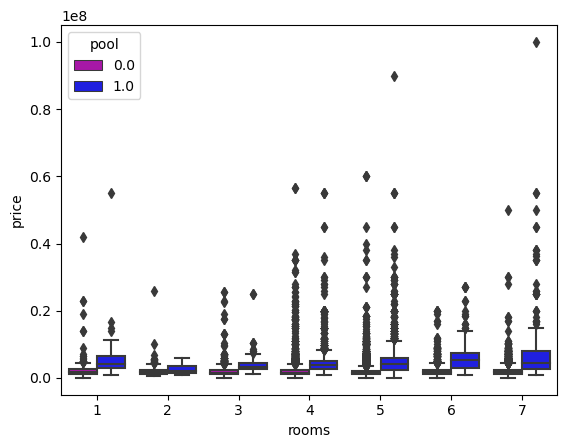

In [19]:
sns.boxplot(x="rooms", y="price",hue='pool', palette=["m", "b"],data=RiyadhVillas);


In [20]:
Q1 = RiyadhVillas.price.quantile(0.25)
Q3 = RiyadhVillas.price.quantile(0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
RiyadhVillas.loc[RiyadhVillas["price"] > upper,"price"] = upper

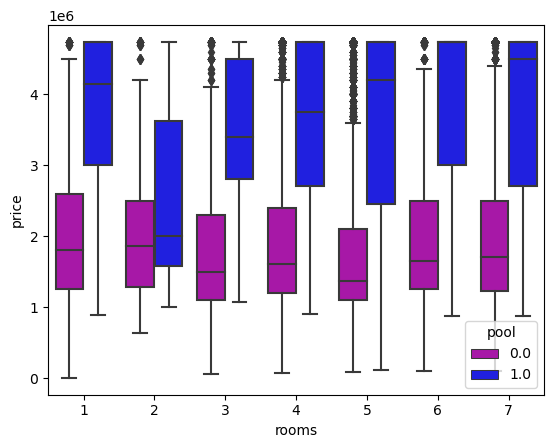

In [21]:
sns.boxplot(x="rooms", y="price",hue='pool', palette=["m", "b"],data=RiyadhVillas);

In [22]:
RiyadhVillas.describe()

rooms   streetWidth        stairs   propertyAge    driverRoom  \
count  46634.000000  46634.000000  46634.000000  46634.000000  46634.000000   
mean       4.682292     18.158447      0.684543      2.433353      0.354956   
std        1.100457      4.167149      0.464702      6.460696      0.478505   
min        1.000000      1.000000      0.000000      0.000000      0.000000   
25%        4.000000     15.000000      0.000000      0.000000      0.000000   
50%        5.000000     20.000000      1.000000      0.000000      0.000000   
75%        5.000000     20.000000      1.000000      0.000000      1.000000   
max        7.000000    100.000000      1.000000     35.000000      1.000000   

               tent         patio       kitchen   outdoorRoom        garage  \
count  46634.000000  46634.000000  46634.000000  46634.000000  46634.000000   
mean       0.465776      0.769439      0.979243      0.645130      0.908243   
std        0.498833      0.421197      0.142573      0.478479      0.288686   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      1.000000      1.000000      0.000000      1.000000   
50%        0.000000      1.000000      1.000000      1.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             duplex         space      maidRoom      elevator     furnihsed  \
count  46634.000000  46634.000000  46634.000000  46634.000000  46634.000000   
mean       0.298366    375.993910      0.768131      0.235493      0.078269   
std        0.457546    257.818515      0.422031      0.424311      0.268597   
min        0.000000     50.000000      0.000000      0.000000      0.000000   
25%        0.000000    270.000000      1.000000      0.000000      0.000000   
50%        0.000000    312.000000      1.000000      0.000000      0.000000   
75%        1.000000    400.000000      1.000000      0.000000      0.000000   
max        1.000000  10000.000000      1.000000      1.000000      1.000000   

              pool      basement         price   square price  
count  46634.00000  46634.000000  4.663400e+04   46634.000000  
mean       0.11601      0.037076  2.044165e+06    6084.847295  
std        0.32024      0.188950  1.152807e+06    4476.521204  
min        0.00000      0.000000  1.080000e+03       3.428571  
25%        0.00000      0.000000  1.175000e+06    3871.681416  
50%        0.00000      0.000000  1.600000e+06    5000.000000  
75%        0.00000      0.000000  2.600000e+06    7600.000000  
max        1.00000      1.000000  4.737500e+06  136144.578313

# summary statistics, visualizations

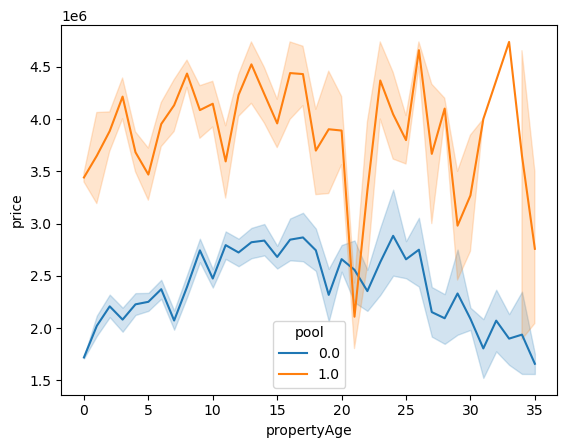

In [23]:

sns.lineplot(x="propertyAge", y="price",hue='pool',data=RiyadhVillas);

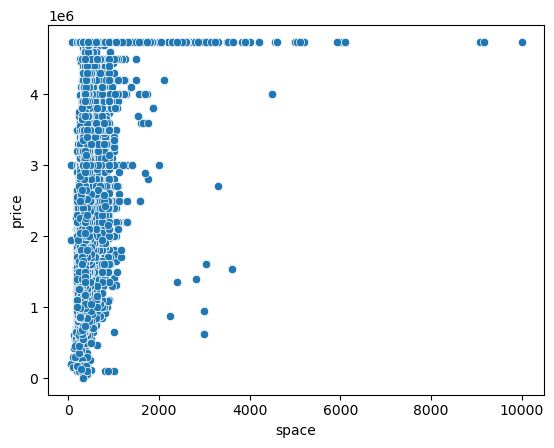

In [24]:
sns.scatterplot(x="space", y="price",data=RiyadhVillas);

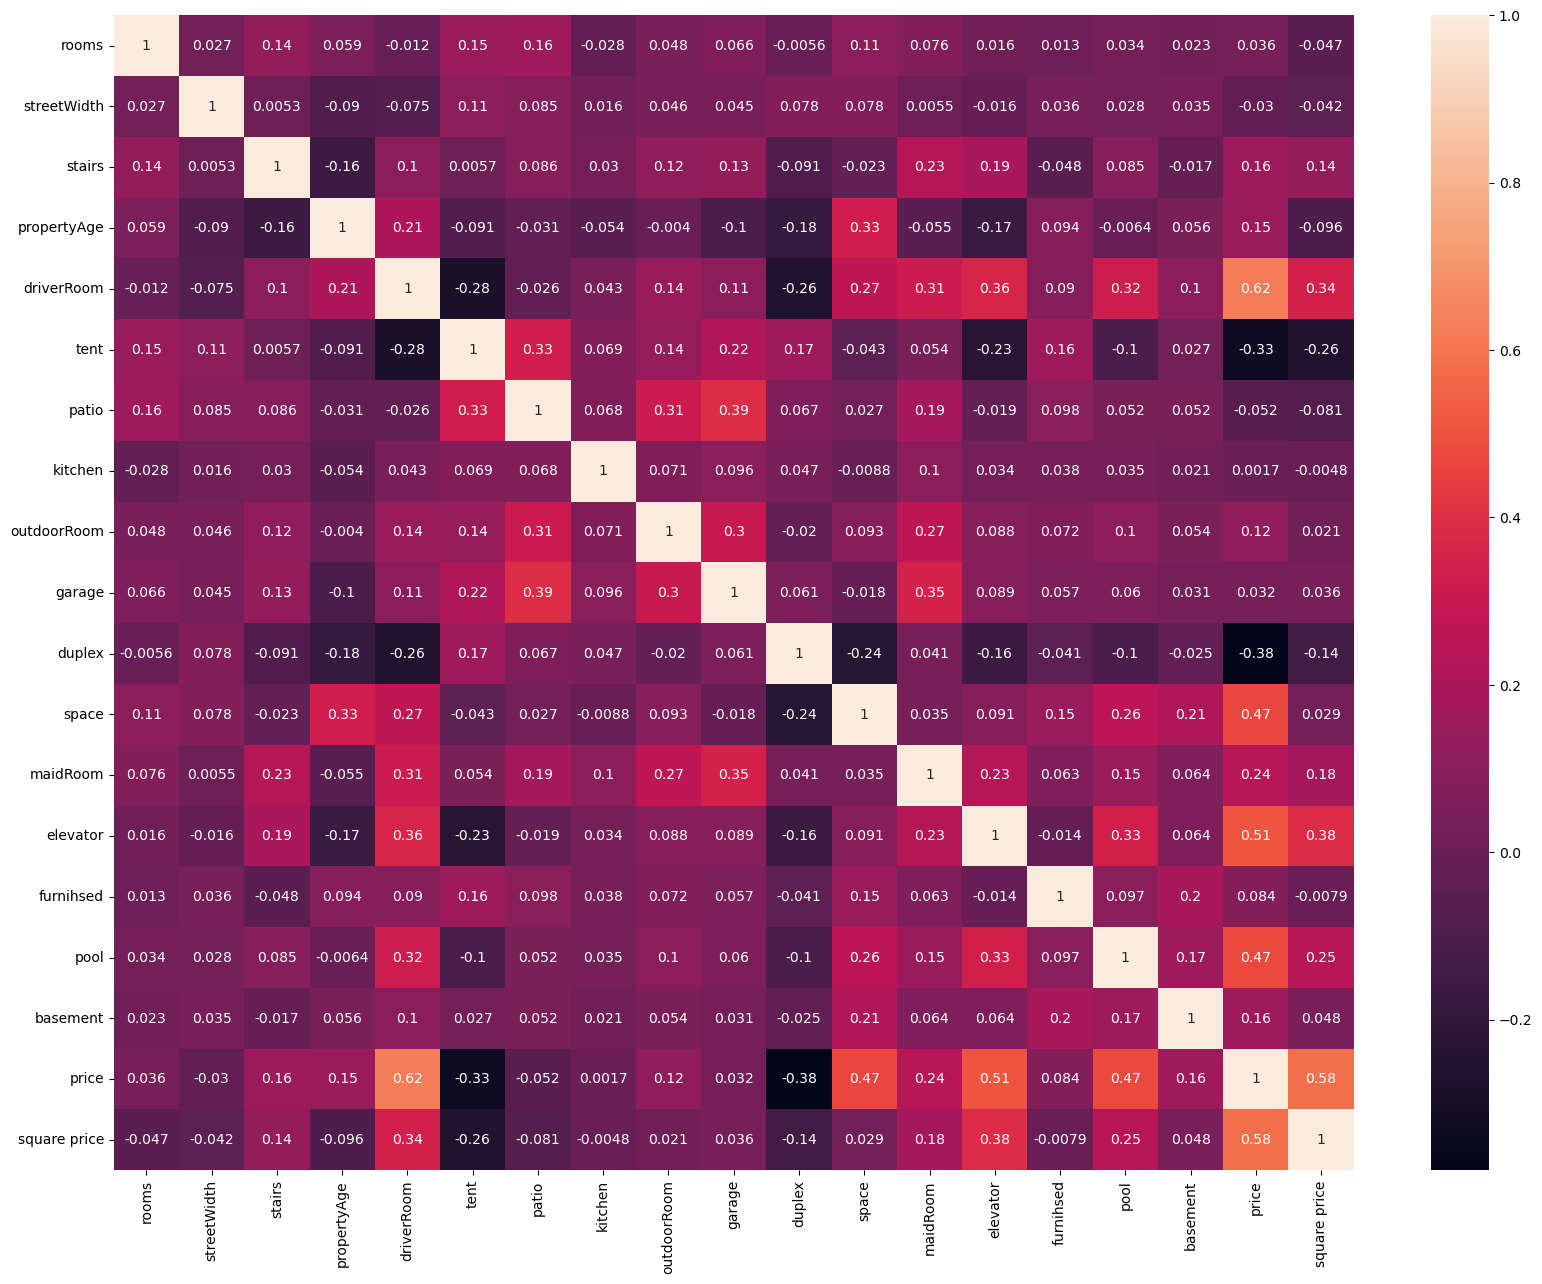

In [25]:
plt.figure(figsize=[20,15])
sns.heatmap(RiyadhVillas.corr(), annot=True);

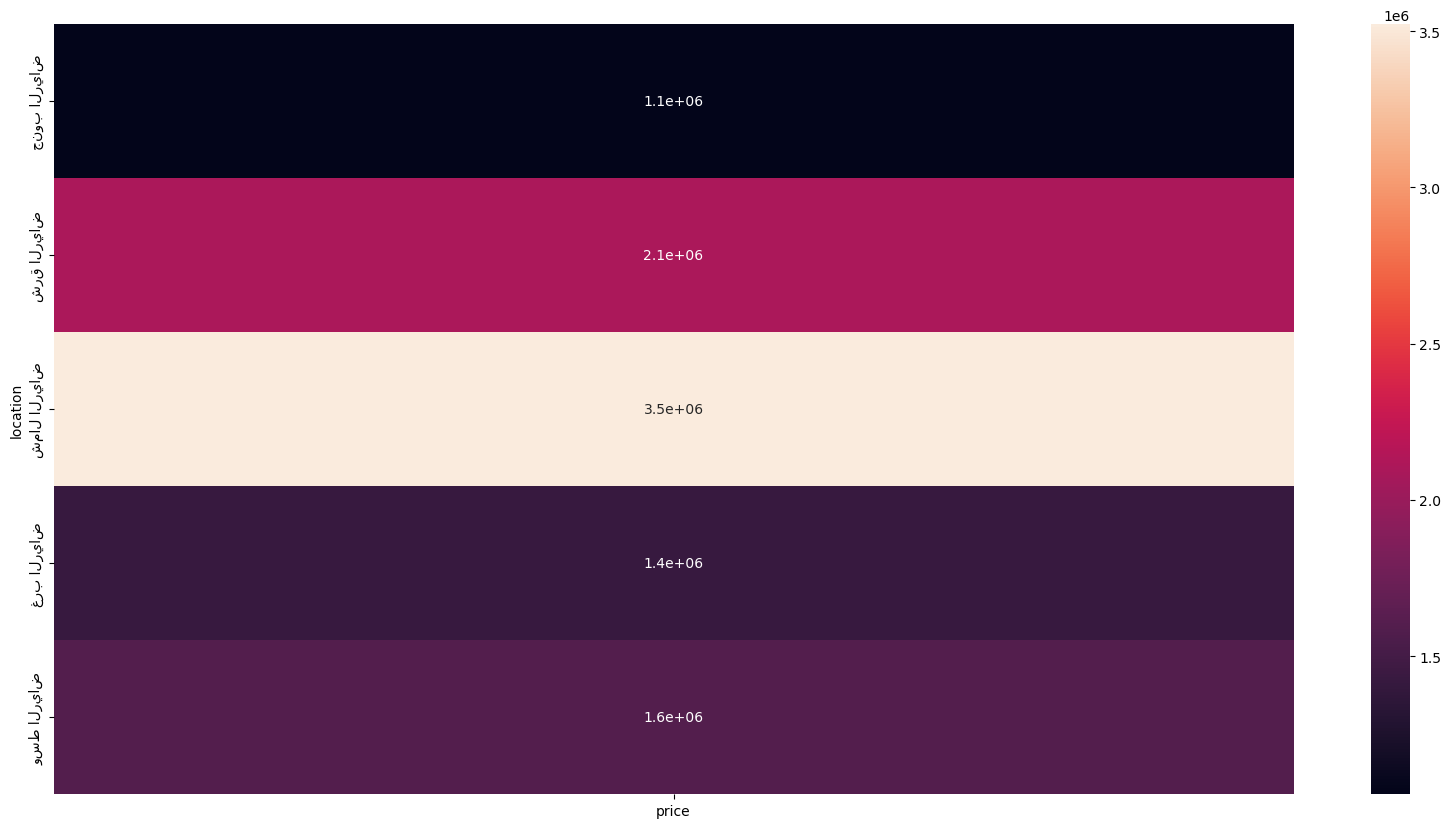

In [26]:
plt.figure(figsize=[20,10])
pivot_table = RiyadhVillas.pivot_table(index='location', values='price', aggfunc='mean')

sns.heatmap(pivot_table, annot=True);

# Data visualization

In [27]:
RiyadhVillas.head()

front  rooms lounges bathrooms  streetWidth  stairs  propertyAge  \
0         شرقية      5     4.0        5+         20.0     1.0          0.0   
1         غربية      4     3.0        5+         20.0     1.0          0.0   
2  جنوبية شرقية      7     2.0        5+         15.0     1.0         31.0   
3         غربية      7     3.0        5+         15.0     1.0          3.0   
4        شمالية      4     2.0         4         25.0     1.0          0.0   

   driverRoom  tent  patio  ...  apartments  maidRoom  elevator  furnihsed  \
0         1.0   1.0    1.0  ...           0       0.0       0.0        0.0   
1         1.0   1.0    1.0  ...         2.0       1.0       1.0        0.0   
2         1.0   0.0    1.0  ...           0       1.0       0.0        0.0   
3         0.0   1.0    1.0  ...           0       1.0       0.0        1.0   
4         1.0   1.0    1.0  ...         3.0       1.0       1.0        1.0   

   pool basement  neighbourhood     location      price  square price  
0   0.0      0.0          عكاظ   جنوب الرياض  1050000.0   3500.000000  
1   0.0      0.0       المهدية    غرب الرياض  3000000.0   5555.555556  
2   0.0      0.0         الشفا   جنوب الرياض  2000000.0   2285.714286  
3   0.0      0.0      ظهرة لبن    غرب الرياض   894000.0   4470.000000  
4   0.0      0.0         قرطبة    شرق الرياض  3500000.0   8750.000000  

[5 rows x 25 columns]

In [43]:
t = RiyadhVillas.groupby('front')['price'].mean()

fig_bar_ = px.bar(t, x= t.index, y='price',  barmode='group', color = t.index)
fig_bar_.show()

In [29]:
fig = go.Figure(data=go.Scatter(x=RiyadhVillas['rooms'], y=RiyadhVillas['price'], mode='markers'))

fig.update_layout(
    title="House Prices by Number of Rooms",
    xaxis_title="Number of Rooms",
    yaxis_title="Price (SAR)",
    showlegend=False
)


fig.show()

In [30]:
front = RiyadhVillas['front']
neighbourhood = RiyadhVillas['neighbourhood']
location = RiyadhVillas['location']

df = pd.DataFrame({'front': front, 'neighbourhood': neighbourhood, 'location': location})
counts = df.groupby(['front', 'neighbourhood', 'location']).size().reset_index(name='count')


fig = px.sunburst(counts, path=['location',  'front','neighbourhood'], values='count')
fig.show()

In [31]:
import plotly.express as px
fig = px.parallel_coordinates(RiyadhVillas, dimensions=['rooms', 'pool', 'price'], color='price',color_continuous_midpoint=40)

fig.show()

In [32]:
tt = pd.DataFrame(RiyadhVillas[['neighbourhood']].value_counts().head(10).reset_index())
tt = tt.rename(columns={'index':'neighbourhood', 0:'counts'})
px.pie(tt,names='neighbourhood',values= 'counts', title='The Top 10 neighbourhood ')


In [33]:
plty=px.line(RiyadhVillas,x="streetWidth",y="propertyAge", markers=True,title="relationship beteen street Width and property Age" )
plty.update_traces(mode='markers')

In [34]:

avg_price_by_neighbourhood = RiyadhVillas.groupby('neighbourhood')['price'].mean()



fig = go.Figure(data=go.Bar(x=avg_price_by_neighbourhood.index, y=avg_price_by_neighbourhood.values))
fig.update_layout(
    title="Average House Price by Neighbourhood",
    xaxis_title="Neighbourhood",
    yaxis_title="Average Price (SAR)"
)

fig.show()

In [47]:

app = JupyterDash(external_stylesheets=[dbc.themes.LUX])
custom_font = "Tahoma, Arial, sans-serif"
app.layout=dbc.Container([html.H1("اسعار الفلل في الرياض",style = {'text-align':'center' ,  'color': 'white', "font":"Tahoma"})
                         ,
                         dbc.Row([ 
                            dbc.Col([
            dcc.Dropdown(id="dropdown", options=[{'label': i, 'value': i} for i in RiyadhVillas['location'].unique()], 
                         value="شمال الرياض") # First graph
            ],width=15, style={'background-color': '#000500'})
                         ]),
                          dbc.Row([ 
                           dbc.Col([ dcc.Checklist(['driverRoom', 'elevator', 'pool'],id='Checklist',style={'color':'#fff'})
                                   ],width=15, style={'background-color': '#000500'})
                          
                          
                          ]),
                           dbc.Row([ 
                               dbc.Col([
                                   dcc.Slider(
            min(RiyadhVillas['propertyAge']),
            max(RiyadhVillas['propertyAge']),
                                       id='Slider',
            step=1,
            value=5,
                                   )
                               ],width=15, style={'background-color': '#000500'})
                           ]),
                           dbc.Row([
                               
                         dbc.Col([
                             
                             dcc.Graph(id="graph1") 
                         ],width=15, style={'background-color': '#000500'})
                           ]), 
                          dbc.Row([
                               
                         dbc.Col([
                             
                             dcc.Graph(id="graph2") 
                         ],width=15, style={'background-color': '#000500'})
                          ])
                         ], fluid=True, style={'background-color': '#000500','direction': 'rtl'})
@app.callback(
            [Output("graph1", "figure"),
             Output("graph2", "figure")],
            [Input("dropdown", "value"),
    Input("Checklist", "value"),
    Input("Slider", "value")]
)
def func(DW,CH,SC):
    filtered_data = RiyadhVillas[(RiyadhVillas['location'] == DW)]
    
    if SC is not None:
        filtered_data = filtered_data[(filtered_data['propertyAge'] == SC)]
    
    if CH is not None:
        for feature in CH:
            filtered_data = filtered_data[filtered_data[feature] == True]
            
    hist_chart = px.histogram(filtered_data, x='front',title = f'عدد الفلل في {DW} حسب الإتجاه')
    hist_chart.update_layout(title_font=dict(family=custom_font))
    fd=filtered_data.groupby("front").mean().reset_index()
    bar_chart= px.bar(fd, x="front", y="price", title=f"مقارنة اسعار الفلل في {DW}")
    bar_chart.update_layout(title_font=dict(family=custom_font))
    return hist_chart, bar_chart
                          
app.run_server(port=8095)

Dash app running on http://127.0.0.1:8095/
